# Project 2: Evolutionary Computing
### Student: Eduardo S. Ito (RA 159086)
### Student: Thales E. Nazatto (RA 074388)

# 1 Introdução

<p>Conforme referência [1], o problema da mochila (knapsack problem) é um problema de otimização combinatória, cujo objetivo é preencher uma mochila com o maior valor possível, não excedendo a capacidade máxima. A formulação do problema é extremamente simples, porém a solução é mais complexa, inclusive faz parte dos 21 problemas NP-completos de Richard Karp.<p>
<p>O modelo evolucionário adotado será o Algoritmo Genético (GA).<p>
<p>A implementação foi realizada utilizado mecanismo de OOP (Object Oriented Programming). A definição do problema é tratada pela classe KnapsackProblem (em problem.py), onde a função de fitness está implementada. A geração da população é realizada pela classe GenerationManager (em generation.py). A seleção da população pode ser realizada através de dos seguintes métodos 
roulette wheel, tournament battle royale e tournament playoff gerenciada pela classe Selection (em selection.py). A reprodução (crossover) pode ser realizada pelo método Asexual, Sexual com apenas um simples ponto, sexual em dois pontos na classe Reproduction (em reproduction.py). A mutação pode ser realizada pelos métodos generative, swap, sequence swap pela classe Mutation (em mutation.py). A controle da geração da nova população bem como encontrar as medidas de fitness, é realizada pela classe GeneticalgorithmFacade (em genetic_algorithm.py). A chamada de execução do algoritmo genético é realizada pelo método run_ga definido aqui no jupyter notebook com entrada de parâmetros número de gerações (generations), que também é o critério de parada, o tamanho da população de cromossomos (population_size), taxa de reprodução (crossover_probability), taxa de mutação (mutation_probability), vetores de valores, custos, pesos e o peso máximo que um repositório pode carregar, pode ser uma mochila, um caminhão, etc.<p>
<p>O mecânismo de parada (stop criteria) é realizada pela classe stop_criteria.py pela tupla stop_criteria com o parâmetro num_generations que indica o número de gerações dentro do período de estabilidade  (steady period), onde não há oscilação significativa dos valores do fitness, e o parâmetro type cujo default é StopCriteriaType.STEADY_PERIOD.<p>
<p>A figura abaixo ilustra como será resolvido um problema em alto nível. Uma mochila teria a capacidade de carregar um peso máximo de 20 (MaxWeight) e teria que levar alguma combinações de items, que tem pesos (itemWeight) e valores (itemvalue), objetivamente levar items cuja combinação de pesos não excedam a capacidade da mochila de 20 unidades e o máximo de valores. Por critério de notação, valores e custos podem significar a mesma coisa neste projeto. No exemplo abaixo, a abstração mostra que cada item do produto é representado de forma binária (0: não carrega o produto, 1: carrega o produto). Inicialmente inicia-se uma população com um certo tamanho de cromossomos (no examplo é 4). Na reprodução (crossover), nova população é gerada com alelos dos pais. População que foi gerada a partir do crossover podem sofrer mutações em algum alelo de forma aleatória. A população final, se será integrada com a população inicial, dependende da estratégia de geração.<p>

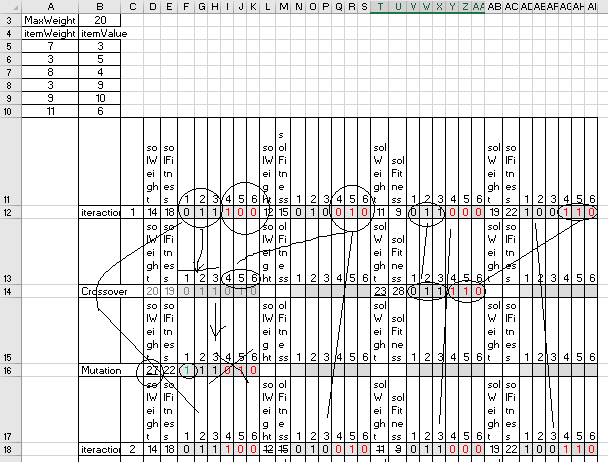

# 2 Requisito do Projeto

In [14]:
import os
os.startfile('p2.pdf')

# 3 Modelamento

In [15]:
import os
os.startfile('modellingClasses.pdf')

# 4 Solução do Problema
## 4.1 Definições de bibliotecas (libraries) e funções iniciais obrigatórias

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
from IPython.display import IFrame, display
import tabulate
from PIL import Image
import os
from IPython.core.display import display, HTML
import tabulate
from PIL import Image

from knapsack.config import Config
from knapsack.genetic_algorithm import GeneticAlgorithmFacade
from knapsack.generation import GenerationStrategy
from knapsack.mutation import MutationStrategy
from knapsack.problem import ProblemType
from knapsack.reproduction import ReproductionStrategy
from knapsack.selection import SelectionStrategy
from knapsack.stop_criteria import StopCriteriaType

def plot_fitness(generationsResult):
    best = list(map(lambda result: result["best"], generationsResult))
    mean = list(map(lambda result: result["mean"], generationsResult))
    worst = list(map(lambda result: result["worst"], generationsResult))
    plt.plot(best, label="best")
    plt.plot(mean, label="mean")
    plt.plot(worst, label="worst")

    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Knapsack Problem")
    plt.legend(loc='lower left', frameon=True)

    plt.show()

## 4.2 Aplicações do Knapsack problem

### 4.2.1 Problema do carreto (cargo). Como levar o máximo de valores dentro do peso suportado pelo caminhão?

Processing ...generating file1.txt for graphics and file2.txt for detailed population generations
[1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1] 3070
[1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] 3140
[1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1] 3070
[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1] 3060
[1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] 3140
[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1] 2940
[1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] 3140
[0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] 2810
[1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] 3140
[0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1] 2810
[1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] 3140
[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] 3190
[1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1] 3140
[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] 3190
[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] 3190
[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] 3190
[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] 3190
[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] 3190
[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1] 3190
[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] 3060
[0

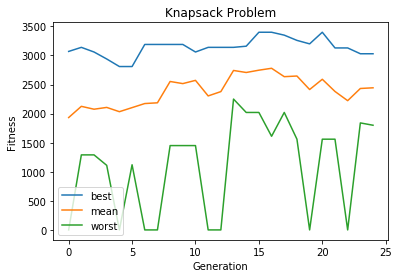

In [24]:
# Caso 1: Cargo

config = Config({
    'problem': {
    'type': ProblemType.MAXIMIZATION,                           # MINIMIZATION, MAXIMIZATION
    'values': [0, 1],
    'costs': [100, 350, 200, 90, 500, 250, 220, 360, 150, 700, 400, 230, 550],
    'weights': [50, 90, 30, 40, 100, 70, 20, 80, 80, 90, 50, 30, 70],
    'cargo': 600
    },
    'selection': {
        'strategy': SelectionStrategy.ROULETTE # ROULETTE, TORNAMENT_BATTLE_ROYALE, or TOURNAMENT_PLAYOFF
    },
    'reproduction': {
        'strategy': ReproductionStrategy.SEXUAL_DOUBLE_POINTS,  # ASEXUAL, SEXUAL_SINGLE_POINT, SEXUAL_DOUBLE_POINTS
        'rate': 0.8
    },
    'mutation': {
        'strategy': MutationStrategy.SEQUENCE_SWAP,            # GENERATIVE, SWAP, SEQUENCE_SWAP
        'rate': 0.2
    },
    'generation': {
        'strategy': GenerationStrategy.EXCHANGE,               # EXCHANGE, ELITISM, STEADY_STATE
        'population_size': 25,
    },
    'stop_criteria': {
        'num_generations': 10, #Used only on MAX_GENERATIONS and STEADY_PERIOD
        'type': StopCriteriaType.STEADY_PERIOD                 # MAX_GENERATION, MAX_FITNESS, CONVERGENCE, STEADY_PERIOD
        }
})

generationsResult = GeneticAlgorithmFacade(config).execute()

plot_fitness(generationsResult)

### 4.2.2 Problema da mochila. Como levar o máximo de valores dentro do peso suportado pela mochila?

Processing ...generating file1.txt for graphics and file2.txt for detailed population generations
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24
[0, 1, 0, 1, 1, 0] 24

Best choice: 
[0, 1, 0, 1, 1, 0] - Fitness: 24 - Cost: 24 - Cargo: 15 - Generations at stop criteria: 10


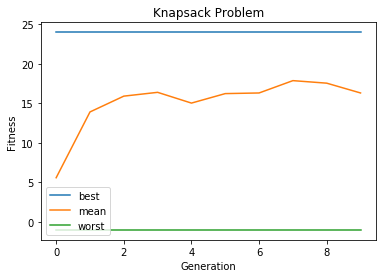

In [23]:
# Caso 2: Knapsack problem

# Knapsack maximum capabilityKnapsack
maxWeight=20

# Product List for Knapsack

config = Config({
    'problem': {
    'type': ProblemType.MAXIMIZATION,                           # MINIMIZATION, MAXIMIZATION
    'values': [0, 1],
    'costs': [3, 5, 4, 9, 10, 6],
    'weights': [7, 3, 8, 3, 9, 11],
    'cargo': 20
    },
    'selection': {
        'strategy': SelectionStrategy.ROULETTE  # ROULETTE, TORNAMENT_BATTLE_ROYALE, or TOURNAMENT_PLAYOFF
    },
    'reproduction': {
        'strategy': ReproductionStrategy.SEXUAL_DOUBLE_POINTS,   # ASEXUAL, SEXUAL_SINGLE_POINT, SEXUAL_DOUBLE_POINTS
        'rate': 0.8
    },
    'mutation': {
        'strategy': MutationStrategy.SEQUENCE_SWAP,            # GENERATIVE, SWAP, SEQUENCE_SWAP
        'rate': 0.2
    },
    'generation': {
        'strategy': GenerationStrategy.EXCHANGE,               # EXCHANGE, ELITISM, STEADY_STATE
        'population_size': 25,
    },
    'stop_criteria': {
        #'fitness': 0, #Used only on MAX_FITNESS
        'num_generations': 10, #Used only on MAX_GENERATIONS and STEADY_PERIOD
        'type': StopCriteriaType.STEADY_PERIOD                 # MAX_GENERATION, MAX_FITNESS, CONVERGENCE, STEADY_PERIOD
        }
})

generationsResult = GeneticAlgorithmFacade(config).execute()

plot_fitness(generationsResult)

## 4.3 Avaliação de Desempenho

|Acronym|Strategy|Type|Description|Status|
|-------|--------|----|-----------|------|
|P1|Problem|MAXIMIZATION|Default|Ativo|
|P2|Problem|MINIMIZATION|xxxxx|Passivo|
|S1|Selection|TOURNAMENT_BATTLE_ROYALE|Escolha aleatória da população e torneio entre eles|Passivo|
|S2|Selection|ROULETTE|Seleciona individuais aleatoriamente, fornecendo chances de reprodução ao fittest|Passivo|
|S3|Selection|TOURNAMENT_PLAYOFF|xxxxx|Passivo|
|R1|Reproduction|ASEXUAL|Duplicação de cromossomos|Passivo|
|R2|Reproduction|SEXUAL_SINGLE_POINT|Apenas um ponto de crossover|Ativo|
|R3|Reproduction|SEXUAL_DOUBLE_POINTS|Dois pontos de crossover|Passivo|
|M1|Mutation|GENERATIVE|Aumenta alelos mutantes|Passivo|
|M2|Mutation|SWAP|Dois alelos aleatórios se trocam de posição|Passivo|
|M3|Mutation|SEQUENCE_SWAP|Um conjunto de alelos no cromossomos muda de ordem|Ativo|
|G1|Generation|EXCHANGE|A população gerada substitui totalmente a anterior|Ativo|
|G2|Generation|ELITISM|A população gerada substitui a anterior, com apenas o fittest da anterior|Passivo|
|G3|Generation|STEADY_STATE|M <N individuais são gerados e o M substitui o pior M da população como um todo|Passivo|
|X1|Stop Criteria|MAX_GENERATION|xxxxx|Passivo|
|X2|Stop Criteria|MAX_FITNESS|xxxxx|Passivo|
|X3|Stop Criteria|CONVERGENCE|xxxxx|Passivo|
|X4|Stop Criteria|STEADY_PERIOD|Parada no período de estabilidade ou convergência (last k generations)|Ativo|

|Problema|Fitness|Valor  |Peso   |Stop (Parada)|Comentário|
|--------|-------|-------|-------|-------------|----------|
|Cargo (P1, S1, R2, M3, G1, X4)|3360|3360|580|10|Convergência prematura|
|Cargo (P1, S2, R2, M3, G1, X4)|3510|3510|560|10|Convergência prematura|
|Cargo (P1, S2, R3, M3, G1, X4)|3400|3400|550|10|Convergência não prematura|
|Mochila (P1, S1, R2, M3, G1, X4)|20|20|17|10|Convergência prematura|
|Mochila (P1, S2, R2, M3, G1, X4)|24|24|15|10|Convergência prematura|
|Mochila (P1, S2, R3, M3, G1, X4)|24|24|15|10|Convergência prematura|

# 5 Conclusão
<p>A convergência, se prematura ou não, do valor do fitness depende de combinações das estratégias. Valores ótimos do fitness também depende de combinações das estratégias usadas. <p>

# 6 Referências
<ol>
<li>https://pt.wikipedia.org/wiki/Problema_da_mochila</li>
<li>https://www.youtube.com/watch?v=9kbzMeEBvUY</li>
</ol>

# Versões
### v1.0 Eduardo mais envolvido com o notebook e modelamento e menos envolvido com código. Thales menos envolvido com notebook e mais envolvimento com código.